In [141]:
!pip install tensorflow

In [142]:
import tensorflow as tf

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [144]:
mnist=tf.keras.datasets.mnist

In [145]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [146]:
(X_train_full,Y_train_full),(X_test_full,Y_test_full)=mnist.load_data()

In [147]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [148]:
X_train_full.shape,X_test_full.shape

((60000, 28, 28), (10000, 28, 28))

In [149]:
Y_test_full.shape,Y_train_full.shape

((10000,), (60000,))

In [150]:
X_valid,X_train=X_train_full[:5000],X_train_full[5000:]

In [151]:
X_valid.shape,X_train.shape

((5000, 28, 28), (55000, 28, 28))

In [152]:
Y_valid,Y_train=Y_train_full[0:5000],Y_train_full[5000:]

In [153]:
Y_valid.shape,Y_train.shape

((5000,), (55000,))

In [154]:
X_valid=X_valid/255
X_test_full=X_test_full/255
X_train=X_train/255

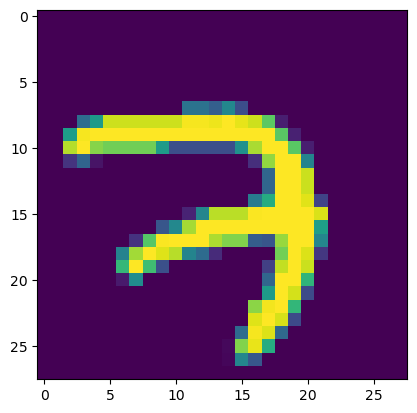

In [155]:
plt.imshow(X_train[0])
plt.show()

In [156]:
valid=(X_valid,Y_valid)

In [157]:
layers=[tf.keras.layers.Flatten(input_shape=(28,28),name="HL1"),
        tf.keras.layers.Dense(300,activation="relu",name="HL2"),
         tf.keras.layers.Dense(100,activation="relu",name="HL3"),
        tf.keras.layers.Dense(10,activation="softmax",name="output")]

In [158]:
model_clf=tf.keras.models.Sequential(layers)

In [159]:
model_clf.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Flatten)               (None, 784)               0         
                                                                 
 HL2 (Dense)                 (None, 300)               235500    
                                                                 
 HL3 (Dense)                 (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [160]:
model_clf.layers

In [161]:
model_clf.compile(loss="sparse_categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [162]:
epochs=30

In [ ]:
history=model_clf.fit(X_train,Y_train,epochs=30,validation_data=valid)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6182 - accuracy: 0.8377 - val_loss: 0.3134 - val_accuracy: 0.9134
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2881 - accuracy: 0.9179 - val_loss: 0.2394 - val_accuracy: 0.9342
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2352 - accuracy: 0.9329 - val_loss: 0.2063 - val_accuracy: 0.9396
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2012 - accuracy: 0.9422 - val_loss: 0.1753 - val_accuracy: 0.9502
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1758 - accuracy: 0.9492 - val_loss: 0.1596 - val_accuracy: 0.9548
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1564 - accuracy: 0.9551 - val_loss: 0.1437 - val_accuracy: 0.9594
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1402 - accuracy: 0.9594 - val_loss: 0.1316 - val_accuracy:

In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test_full,Y_test_full)

In [ ]:
X_new=X_test_full[:3]

In [ ]:
actual=Y_test_full[:3]

In [ ]:
actual

In [ ]:
Y_predict=model_clf.predict(X_new)

In [ ]:
Y_predict.round(2)

In [ ]:
Y_predict

In [ ]:
import numpy as np

In [ ]:
Y_predict=np.argmax(Y_predict,axis=-1)

In [ ]:
Y_predict